In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv(r'D:\books for study\Kaggle works\Binary classification of insurance Cross Selling/train.csv')
df_sample=pd.read_csv(r'D:\books for study\Kaggle works\Binary classification of insurance Cross Selling/sample_submission.csv')
df_test=pd.read_csv(r'D:\books for study\Kaggle works\Binary classification of insurance Cross Selling/test.csv')

In [3]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df_sample.head()

,id,Response
0,11504798,0.5
1,11504799,0.5
2,11504800,0.5
3,11504801,0.5
4,11504802,0.5


In [5]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [7]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [8]:
df_train.shape,df_test.shape

((11504798, 12), (7669866, 11))

In [9]:
df_train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
df_train.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
5965792,5965792,Female,41,1,33.0,1,1-2 Year,No,2630.0,138.0,22,0
5439067,5439067,Female,72,1,28.0,1,1-2 Year,No,2630.0,124.0,240,0
8439586,8439586,Female,24,1,3.0,1,< 1 Year,No,25461.0,160.0,10,0
5063290,5063290,Male,73,1,28.0,0,1-2 Year,Yes,42688.0,122.0,20,0
8500648,8500648,Male,43,1,28.0,0,1-2 Year,Yes,47665.0,124.0,153,0


In [11]:
df_train['Gender']=df_train['Gender'].map({'Male':1,'Female':0})

In [12]:
df_train.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
4221118,4221118,1,52,1,28.0,0,> 2 Years,Yes,38357.0,13.0,151,0
3077115,3077115,1,33,1,7.0,0,1-2 Year,Yes,31244.0,124.0,77,0
6190325,6190325,1,69,1,46.0,0,1-2 Year,Yes,27372.0,26.0,275,0
7994543,7994543,0,24,1,13.0,1,< 1 Year,No,34958.0,152.0,282,0
11204985,11204985,0,75,1,2.0,1,1-2 Year,No,35782.0,26.0,103,0


In [13]:
df_train.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [14]:
df_train['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64

In [15]:
df_train['Vehicle_Age']=df_train['Vehicle_Age'].map({'1-2 Year':1,'> 2 Years':2,'< 1 Year':3})

In [16]:
df_train.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [17]:
df_train['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    5783229
No     5721569
Name: count, dtype: int64

In [18]:
df_train['Vehicle_Damage']=df_train['Vehicle_Damage'].map({'Yes':1,'No':0})

In [19]:
df_train['Vehicle_Damage'].value_counts()

Vehicle_Damage
1    5783229
0    5721569
Name: count, dtype: int64

In [20]:
df_train.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [21]:
y=df_train['Response']

In [22]:
X=df_train.drop(['Response'],axis=1)

In [23]:
X.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,1,21,1,35.0,0,1,1,65101.0,124.0,187
1,1,1,43,1,28.0,0,2,1,58911.0,26.0,288
2,2,0,25,1,14.0,1,3,0,38043.0,152.0,254
3,3,0,35,1,1.0,0,1,1,2630.0,156.0,76
4,4,0,36,1,15.0,1,1,0,31951.0,152.0,294


In [24]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Response, dtype: int64

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,train_size=0.8,stratify=y)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
forest =RandomForestClassifier(max_depth=2)
forest.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2)

In [30]:
xtrain.shape,ytrain.shape

((9203838, 11), (9203838,))

In [31]:
xtrain.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1129106,1129106,0,25,1,28.0,0,3,1,30775.0,152.0,256
9554468,9554468,1,48,1,28.0,0,1,1,35693.0,124.0,11
5397130,5397130,1,42,1,45.0,0,1,1,27863.0,124.0,172
1915003,1915003,0,23,1,46.0,1,3,0,22345.0,152.0,130
2508839,2508839,0,42,1,28.0,0,2,1,34367.0,26.0,169


In [74]:
prediction = forest.predict(xtest)

In [55]:
prediction[2000:-1000]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import gc

# Define parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.03,  # Reduced learning rate
    'alpha': 0.1,  # Slightly reduced regularization
    'subsample': 0.851,  # Increased subsample fraction
    'colsample_bytree': 0.45,  # Adjusted colsample_bytree
    'max_depth': 12,  # Reduced max depth
    'min_child_weight': 10,  # Slightly increased to control overfitting
    'gamma': 1e-6,  # Slightly increased gamma
    'random_state': 42,
    'max_bin': 55,  # Reduced max_bin from 50000
    'enable_categorical': True,
    'n_estimators': 100,  # Number of trees
    'tree_method': 'hist'
}

gc.collect()

# Initialize the model
model = XGBClassifier(**params, use_label_encoder=False)

# Convert eval_set to the expected format
eval_set = [(xtest, ytest)]

# Manually implement early stopping
best_score = float('-inf')  # To find the maximum AUC score
early_stopping_rounds = 50
best_iteration = 0

for epoch in range(1, params['n_estimators'] + 1):
    # Fit model incrementally by specifying the number of boosting rounds
    model.set_params(n_estimators=epoch)
    model.fit(xtrain, ytrain, eval_set=eval_set, verbose=False)
    
    # Predict probabilities and calculate the AUC score
    y_pred = model.predict_proba(xtest)[:, 1]
    score = roc_auc_score(ytest, y_pred)
    
    # Check for improvement in AUC score
    if score > best_score:
        best_score = score
        best_iteration = epoch
    else:
        if epoch - best_iteration >= early_stopping_rounds:
            print(f"Early stopping at iteration {epoch}")
            break

# Set the number of estimators to the best iteration found
model.set_params(n_estimators=best_iteration)

# Fit the model on the full training data with the best number of estimators
model.fit(xtrain, ytrain)
print(f"Best iteration: {best_iteration} with AUC score: {best_score}")


C:\Users\hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [15:29:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [15:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [15:29:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\xgboost\core

Best iteration: 100 with AUC score: 0.8663032012403586


In [61]:
prediction =model.predict(xtest)


In [66]:
val_pred_prob =model.predict_proba(xtest)[:, 1]
auc = roc_auc_score(ytest, val_pred_prob)
print(f"Validation AUC: {auc:.5f}")

Validation AUC: 0.86630


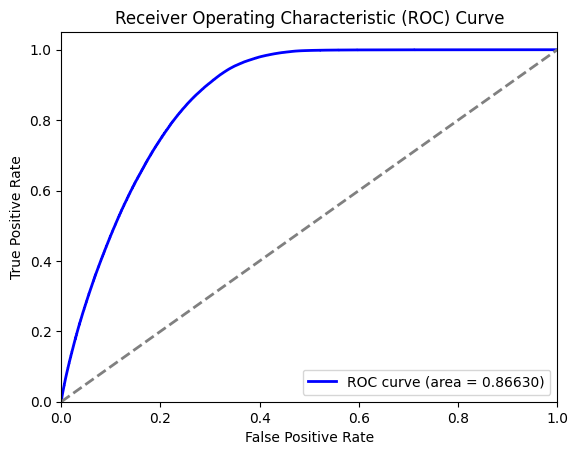

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(ytest, val_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.5f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

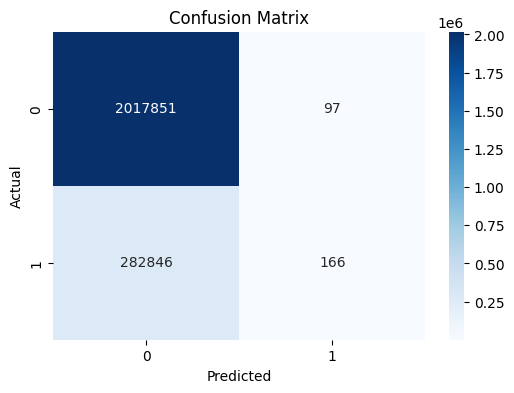

In [69]:
from sklearn.metrics import confusion_matrix
#val_pred = XGB.predict(val_X)
cm = confusion_matrix(ytest, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

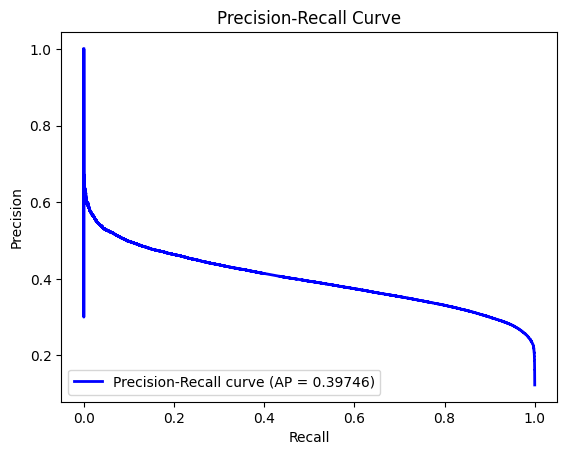

In [73]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, _ = precision_recall_curve(ytest, val_pred_prob)
average_precision = average_precision_score(ytest, val_pred_prob)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.5f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()